In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from tqdm.notebook import tqdm
import getpass
import math
from collections import defaultdict
import numpy as np

In [6]:
client_id = getpass.getpass(prompt='input client_id') 
client_secret = getpass.getpass(prompt='input client_secret')

input client_id········
input client_secret········


In [7]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [8]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        # print(results['next'])
        results = sp.next(results)
        
        tracks.extend(results['items'])
    return tracks

In [9]:
tracks_from_playlist = get_playlist_tracks('spotify', "4rnleEAOdmFAbRcNCgZMpY")

In [11]:
# tracks_from_playlist

In [12]:
len(tracks_from_playlist)

5198

In [13]:
tracks_from_playlist[0]['track']['artists'][0]['name']

'Hozier'

In [44]:
# artist = []
# interim = []
# for j in range(len(tracks_from_playlist[1]['track']['artists'])):
#     interim.append(tracks_from_playlist[1]['track']['artists'][j]['name'])

In [ ]:
# artist.append(interim)

In [ ]:
# artist

In [14]:
tracks_from_playlist[0]['track']['id']

'7dS5EaCoMnN7DzlpT6aRn2'

In [15]:
tracks_from_playlist[0]['track']['name']

'Take Me To Church'

In [18]:
song_id = []
song = []
artist = []
feature = []

for i in range(len(tracks_from_playlist)):
    song_id.append(tracks_from_playlist[i]['track']['id'])
    song.append(tracks_from_playlist[i]['track']['name'])
    interim = []
    for j in range(len(tracks_from_playlist[i]['track']['artists'])):
        interim.append(tracks_from_playlist[i]['track']['artists'][j]['name'])
    artist.append(interim)
    feature.append(sp.audio_features(tracks_from_playlist[i]['track']['id']))

In [19]:
# artist

In [24]:
df__ = pd.DataFrame({'song_id': song_id, 'song': song, 'artist': artist})

In [25]:
df__.shape

(5198, 3)

In [17]:
# feature

In [26]:
sp.audio_features(tracks_from_playlist[0]['track']['id'])[0]

{'danceability': 0.566,
 'energy': 0.664,
 'key': 4,
 'loudness': -5.303,
 'mode': 0,
 'speechiness': 0.0464,
 'acousticness': 0.634,
 'instrumentalness': 0,
 'liveness': 0.116,
 'valence': 0.437,
 'tempo': 128.945,
 'type': 'audio_features',
 'id': '7dS5EaCoMnN7DzlpT6aRn2',
 'uri': 'spotify:track:7dS5EaCoMnN7DzlpT6aRn2',
 'track_href': 'https://api.spotify.com/v1/tracks/7dS5EaCoMnN7DzlpT6aRn2',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7dS5EaCoMnN7DzlpT6aRn2',
 'duration_ms': 241688,
 'time_signature': 4}

In [27]:
len(sp.audio_features(tracks_from_playlist[0]['track']['id']))

1

In [55]:
# df = pd.DataFrame(sp.audio_features(tracks_from_playlist[0]['track']['id'])[0], index = range (1))

In [56]:
# df.head()

In [38]:
features_df = pd.DataFrame(feature).stack().apply(pd.Series)

In [39]:
features_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,0,0.768,0.820,7,-4.630,0,0.0475,0.1790,0.000000,0.704,0.625,129.969,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,0,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,0,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,0,0.778,0.824,10,-5.892,0,0.0712,0.2840,0.000000,0.405,0.756,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4


In [40]:
final_df = pd.DataFrame(np.hstack([df__, features_df]), columns=df__.columns.append(features_df.columns))

In [41]:
final_df.head()

,song_id,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,[Hozier],0.566,0.664,4,-5.303,0,0.0464,0.6340,...,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,"[Mike Posner, Gigamesh]",0.768,0.820,7,-4.630,0,0.0475,0.1790,...,0.704,0.625,129.969,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"[Tyler, The Creator, Kali Uchis]",0.558,0.559,6,-9.222,1,0.0959,0.3710,...,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,3gbBpTdY8lnQwqxNCcf795,Pompeii,[Bastille],0.679,0.715,9,-6.383,1,0.0407,0.0755,...,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),"[Shakira, Wyclef Jean]",0.778,0.824,10,-5.892,0,0.0712,0.2840,...,0.405,0.756,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4


In [42]:
final_df['artist'] = [', '.join(map(str, l)) for l in final_df['artist']]

In [43]:
final_df = final_df.drop(['id', 'type','uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis = 1)

In [44]:
# final_df['artist'] = final_df['artist'].apply(listToString)

In [45]:
# def listToString(s):  
    
#     # initialize an empty string 
#     str1 = " " 
    
#     # return string   
#     return (str1.join(s))

In [46]:
final_df.shape

(5198, 14)

In [47]:
final_df.head()

,song_id,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,Hozier,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945
1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,"Mike Posner, Gigamesh",0.768,0.820,7,-4.630,0,0.0475,0.1790,0.000000,0.704,0.625,129.969
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis",0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558
3,3gbBpTdY8lnQwqxNCcf795,Pompeii,Bastille,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435
4,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),"Shakira, Wyclef Jean",0.778,0.824,10,-5.892,0,0.0712,0.2840,0.000000,0.405,0.756,100.024


In [22]:
# to get a list all the "Meta" categories that spotify works with
# check the 'country' or the 'locale' keyword in categories() to customize your playlist selection 

# categories = sp.categories()   # this is a Spotipy function!

# # these you can loop over to get all the names of these categories

# cat_id = [cat['id'] for cat in categories['categories']['items']]

# cat_name = [cat['name'] for cat in categories['categories']['items']]

# # replace cat['name'] with cat['id'] in there and use these id's to get all the playlists
# # in those categories (again, build a loop)

# # sp.category_playlists(cat_id)   # this is a Spotipy function!

# # From here on, you can drill deeper and get all the songs per playlist, etc...
# # I would write functions for all of these parts. and in the end pass values from functions to functions

# Try to also define a function, which gets a song ID and returns a dictionary with the song features and their values

# because this is what you can use to easily build a dataframe of (the song feature names being the column names), and append it to a dataframe in a loop
# this function is sort of one of the "nucleus" functions of your code

In [20]:
# cat_id

In [21]:
# sp.category_playlists(cat_id[2]).keys()

In [48]:
X = final_df.drop(['song_id', 'song','artist'], axis = 1)

In [49]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945
1,0.768,0.820,7,-4.630,0,0.0475,0.1790,0.000000,0.704,0.625,129.969
2,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558
3,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435
4,0.778,0.824,10,-5.892,0,0.0712,0.2840,0.000000,0.405,0.756,100.024


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_sc, columns=X.columns)

In [51]:
X_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.721659,-0.212301,-0.346536,0.306029,-1.098735,-0.575311,2.383515,-0.210371,-0.503738,-0.347806,0.257684
1,0.766582,0.721189,0.478989,0.592553,-1.098735,-0.563941,0.121852,-0.210371,3.652083,0.475129,0.296411
2,-0.780600,-0.840611,0.203814,-1.362456,0.910138,-0.063678,1.076224,-0.210311,-0.553212,0.453243,-1.647937
3,0.110872,0.092878,1.029339,-0.153773,0.910138,-0.634226,-0.392615,-0.210371,0.591759,0.238754,0.200576
4,0.840257,0.745124,1.304514,0.055266,-1.098735,-0.318977,0.643774,-0.210371,1.538834,1.048557,-0.836100


Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

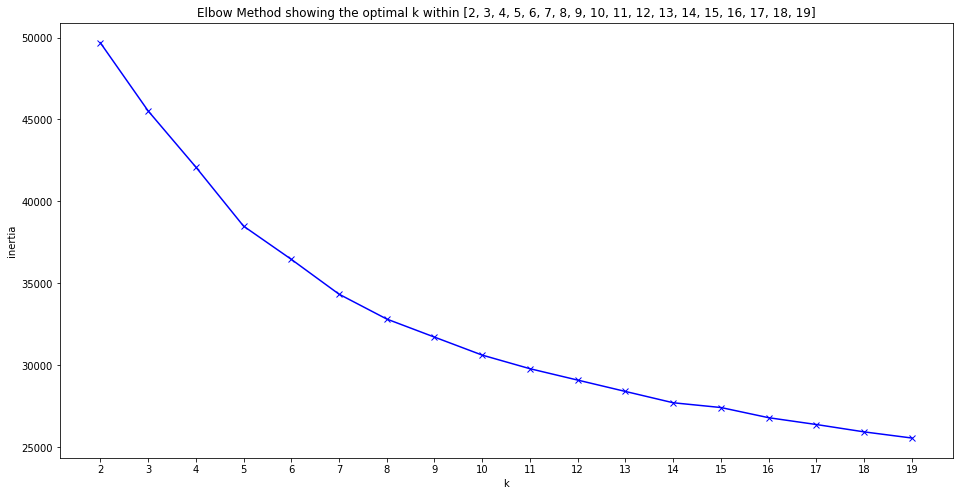

In [52]:
from sklearn.cluster import KMeans

K = range(2,20)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')



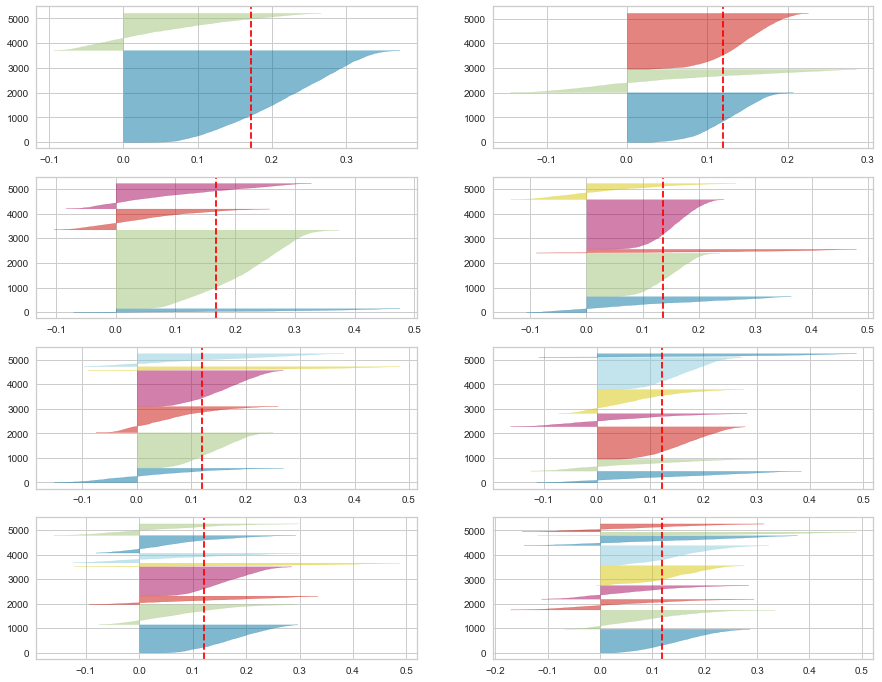

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,12))
for k in [2, 3, 4, 5, 6, 7, 8, 9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k,
                random_state=1234)
    q, mod = divmod(k, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaled)

decided for 4 clusters

In [60]:
kmeans = KMeans(n_clusters=7,
               random_state=1234)

kmeans.fit(X_scaled)

clusters = kmeans.predict(X_scaled)


X_clustered = X_scaled.copy()
X_clustered['cluster_id'] = clusters

In [62]:
X_clustered.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id
0,-0.721659,-0.212301,-0.346536,0.306029,-1.098735,-0.575311,2.383515,-0.210371,-0.503738,-0.347806,0.257684,0
1,0.766582,0.721189,0.478989,0.592553,-1.098735,-0.563941,0.121852,-0.210371,3.652083,0.475129,0.296411,1
2,-0.780600,-0.840611,0.203814,-1.362456,0.910138,-0.063678,1.076224,-0.210311,-0.553212,0.453243,-1.647937,0
3,0.110872,0.092878,1.029339,-0.153773,0.910138,-0.634226,-0.392615,-0.210371,0.591759,0.238754,0.200576,2
4,0.840257,0.745124,1.304514,0.055266,-1.098735,-0.318977,0.643774,-0.210371,1.538834,1.048557,-0.836100,5


In [63]:
def hot_recommender():
    # import scraping function & random int generator
    from scrape_functions import scrape_billboard
    from random import randint
    
    # scrape billboard hot 100
    billboard = scrape_billboard()
    
    # ask for song
    song = input("What song do you like? ")
    
    # check if song is on billboard hot 100
    song_row = billboard[billboard["song"].str.contains(song)]
    if len(song_row) == 0:
        print("Your song is not hot")
    else:
        check_song = input("Did you mean " + song_row["song"].values[0] + " by " + song_row["artist"].values[0] + "? ")    
    
        # if song is in billboard hot 100, recommend another random hot song
        if check_song == "yes":
            print("That's a hot song.")
            random_song = randint(0, len(billboard)-1)
            print("You might also like " + billboard["song"][random_song] + " by " + billboard["artist"][random_song])
        else:
            print("Ah, not the one I had in mind.")


In [64]:
hot_recommender()

What song do you like? blue
Your song is not hot
